### 1. Task: Write a function to simulate the SI dynamic on a generic network and provide a visualisation.

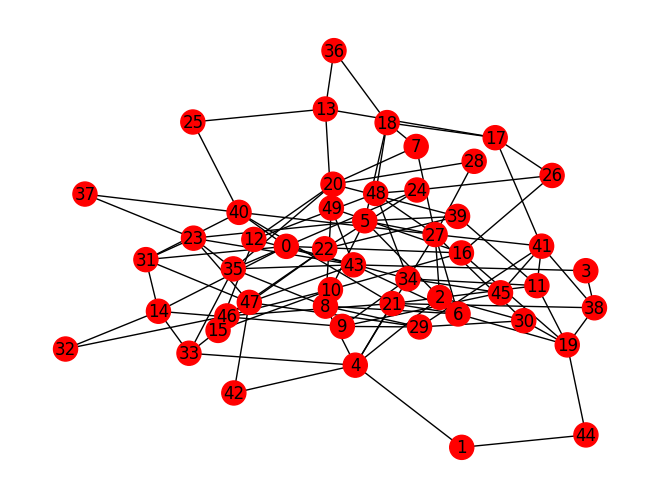

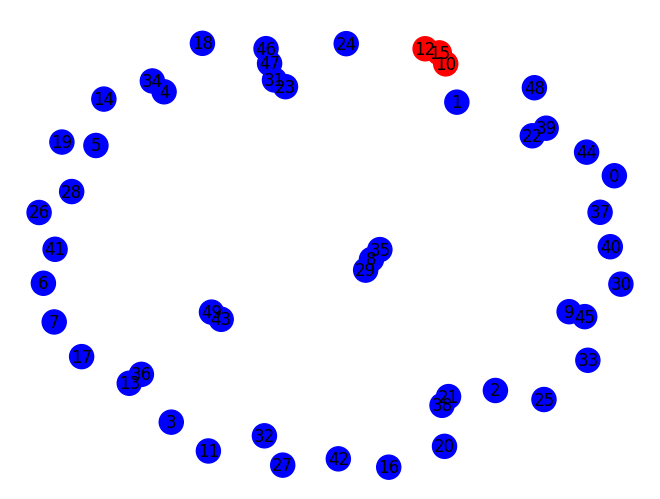

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def si_simulation(graph, beta, seed_node, max_steps=100):
    infected_nodes = set()
    infected_nodes.add(seed_node)
    nodes = set(graph.nodes)

    for step in range(max_steps):
        cp_infected_nodes = infected_nodes.copy()
        susceptible_nodes = nodes - cp_infected_nodes

        for node in susceptible_nodes:
            neighbors = set(graph.neighbors(node))
            infected_neighbors = neighbors & cp_infected_nodes

            v = len(infected_neighbors)
            if v == 0:
                continue
            p = (1 - beta) ** v
            if random.uniform(0, 1) < p:
                continue
            else:
                infected_nodes.add(node)


    return list(infected_nodes)

def visualize_epidemic(graph, infected_nodes):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, node_color=['red' if node in infected_nodes else 'blue' for node in graph.nodes], with_labels=True)
    plt.show()

# Example usage with two provided graphs
graph1_1 = nx.read_gml('graph1.1.gml')
graph1_2 = nx.read_gml('graph1.2.gml')

beta = 0.5
seed = "10"

infected_nodes1_1 = si_simulation(graph1_1, beta, seed)
visualize_epidemic(graph1_1, infected_nodes1_1)

infected_nodes1_2 = si_simulation(graph1_2, beta, seed)
visualize_epidemic(graph1_2, infected_nodes1_2)


In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd


def sis_simulation(graph, beta, gamma, seed, max_steps=100):
    random.seed(seed)
    p = random.uniform(0, 1)

    nodes = set(graph.nodes)
    infected_nodes = set(random.sample(nodes, int(p * len(graph.nodes))))
    susceptible_nodes = nodes - infected_nodes

    rho_i = []
    rho_s = []

    for step in range(max_steps):
        cp_infected_nodes = infected_nodes.copy()
        cp_susceptible_nodes = susceptible_nodes.copy()
        rho_i.append(len(cp_infected_nodes) / len(nodes))
        rho_s.append(len(cp_susceptible_nodes) / len(nodes))

        for node in cp_susceptible_nodes:
            neighbors = set(graph.neighbors(node))
            infected_neighbors = neighbors & cp_infected_nodes

            v = len(infected_neighbors)
            p_infection = 1 - (1 - beta) ** v
            if random.uniform(0, 1) < p_infection:
                infected_nodes.add(node)
                susceptible_nodes.remove(node)

        for node in cp_infected_nodes:
            if random.uniform(0, 1) < gamma:
                infected_nodes.remove(node)
                susceptible_nodes.add(node)

    return rho_i, rho_s

def moving_average(data, window_size):
    return pd.Series(data).rolling(window=window_size).mean()

def sis_simulation_and_plot(graph_file, beta, gamma, seed, max_steps=1000, window_size=20):
    # Load the graph
    graph = nx.read_gml(graph_file)

    # Run the SIS simulation
    infected_ratios, susceptible_ratios = sis_simulation(graph, beta, gamma, seed, max_steps)

    # Calculate moving averages
    infected_ratios_smooth = moving_average(infected_ratios, window_size)
    susceptible_ratios_smooth = moving_average(susceptible_ratios, window_size)

    # Plot results
    plt.plot(infected_ratios_smooth, label='Infected Ratio')
    plt.plot(susceptible_ratios_smooth, label='Susceptible Ratio')
    plt.xlabel('Time Step')
    plt.ylabel('Ratio')
    plt.title(f'SIS Simulation Results for {graph_file}')
    plt.legend()
    plt.show()


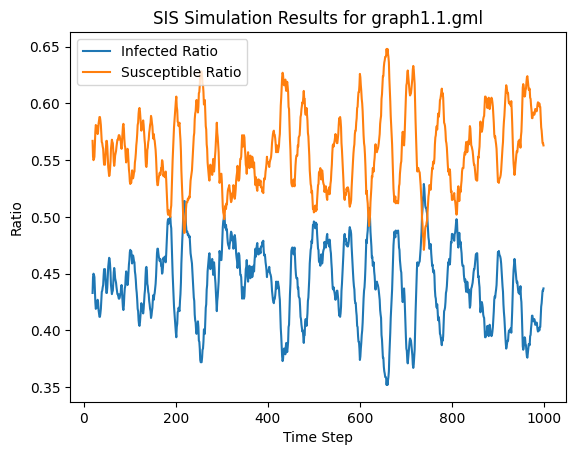

In [21]:
# Example usage
beta = 0.2
gamma = 0.4
seed = 13373

sis_simulation_and_plot('graph1.1.gml', beta, gamma, seed)